<h2>Don't Overfit </h2>

<h2>Problem Statement </h2>

- Donot Overfit 2 is a unique problem statement where we are provided with only 250 training samples and 19750 test samples.
- The Objective of the problem is not to overfit with this train data and generalize well with our test data samples.
- The data set consists of 300 continuous random variables each standardized with mean centered to zero and variance 1.

<h2> Performance Metrics Used </h2>

- The Problem uses ROC AUC SCORE as the metric to measure the model performance

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None   # default='warn'
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy import stats
import xgboost as xgb

<h1>Getting the Data into Data Frame </h1>

In [8]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

<h1>Exploratory Data Analysis </h1>

In [9]:
train_data.describe()

id      target           0           1           2           3  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   124.500000    0.640000    0.023292   -0.026872    0.167404    0.001904   
std     72.312977    0.480963    0.998354    1.009314    1.021709    1.011751   
min      0.000000    0.000000   -2.319000   -2.931000   -2.477000   -2.359000   
25%     62.250000    0.000000   -0.644750   -0.739750   -0.425250   -0.686500   
50%    124.500000    1.000000   -0.015500    0.057000    0.184000   -0.016500   
75%    186.750000    1.000000    0.677000    0.620750    0.805000    0.720000   
max    249.000000    1.000000    2.567000    2.419000    3.392000    2.771000   

                4           5           6           7  ...         290  \
count  250.000000  250.000000  250.000000  250.000000  ...  250.000000   
mean     0.001588   -0.007304    0.032052    0.078412  ...    0.044652   
std      1.035411    0.955700    1.006657    0.939731  ...    1.011416   
min     -2.566000   -2.845000   -2.976000   -3.444000  ...   -2.804000   
25%     -0.659000   -0.643750   -0.675000   -0.550750  ...   -0.617000   
50%     -0.023000    0.037500    0.060500    0.183500  ...    0.067500   
75%      0.735000    0.660500    0.783250    0.766250  ...    0.797250   
max      2.901000    2.793000    2.546000    2.846000  ...    2.865000   

              291         292         293         294         295         296  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.126344    0.018436   -0.012092   -0.065720   -0.106112    0.046472   
std      0.972567    0.954229    0.960630    1.057414    1.038389    0.967661   
min     -2.443000   -2.757000   -2.466000   -3.287000   -3.072000   -2.634000   
25%     -0.510500   -0.535750   -0.657000   -0.818500   -0.821000   -0.605500   
50%      0.091000    0.057500   -0.021000   -0.009000   -0.079500    0.009500   
75%      0.804250    0.631500    0.650250    0.739500    0.493000    0.683000   
max      2.801000    2.736000    2.596000    2.226000    3.131000    3.236000   

              297         298         299  
count  250.000000  250.000000  250.000000  
mean     0.006452    0.009372   -0.128952  
std      0.998984    1.008099    0.971219  
min     -2.776000   -3.211000   -3.500000  
25%     -0.751250   -0.550000   -0.754250  
50%      0.005500   -0.009000   -0.132500  
75%      0.794250    0.654250    0.503250  
max      2.626000    3.530000    2.771000  

[8 rows x 302 columns]

In [10]:
train_data.head(3)

id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...   
1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...   
2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...   

     290    291    292    293    294    295    296    297    298    299  
0  0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
1 -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
2  0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  

[3 rows x 302 columns]

In [11]:
train_data.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [12]:
test_data.head(2)

id      0      1      2      3      4      5      6      7      8  ...  \
0  250  0.500 -1.033 -1.595  0.309 -0.714  0.502  0.535 -0.129 -0.687  ...   
1  251  0.776  0.914 -0.494  1.347 -0.867  0.480  0.578 -0.313  0.203  ...   

     290    291    292    293    294    295    296    297    298    299  
0 -0.088 -2.628 -0.845  2.078 -0.277  2.132  0.609 -0.104  0.312  0.979  
1 -0.683 -0.066  0.025  0.606 -0.353 -1.133 -3.138  0.281 -0.625 -0.761  

[2 rows x 301 columns]

<h4>Columns Description </h4>

- ID- Unique No for Each Datapoint
- Target-Independent Variable
- 0-299-Features having a mean close to 0 and standard deviation 1.

<h3>Check Null Values </h3>

<h5> Q. Is there any null values in this dataset?If yes then how many by count and percentage? </h5>

In [13]:
print((train_data.isna().sum()/train_data.shape[0])*100)

id        0.0
target    0.0
0         0.0
1         0.0
2         0.0
         ... 
295       0.0
296       0.0
297       0.0
298       0.0
299       0.0
Length: 302, dtype: float64


In [14]:
print((test_data.isna().sum()/test_data.shape[0])*100)

id     0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
295    0.0
296    0.0
297    0.0
298    0.0
299    0.0
Length: 301, dtype: float64


- Seems like we dont have null values in our data

<h3>Distribution of Target variable of Train Data Points </h3>

Text(0, 0.5, 'counts')

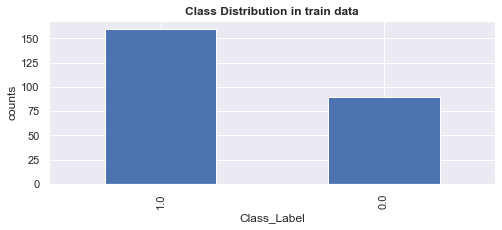

In [15]:
plt.figure(figsize=(8,3))
ax =train_data.target.value_counts().plot(kind='bar')
plt.title('Class Distribution in train data', weight='bold')
plt.xlabel('Class_Label')
plt.ylabel('counts')


<b>
    
- We have 160 data points belonging to Class 1
- We have 90 data points belonging to Class 2
- The Dataset is imbalanced 
    
<b>

In [16]:
train_data['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

In [17]:
X_train=train_data.drop(["id","target"],axis=1)
Y_train=train_data["target"]

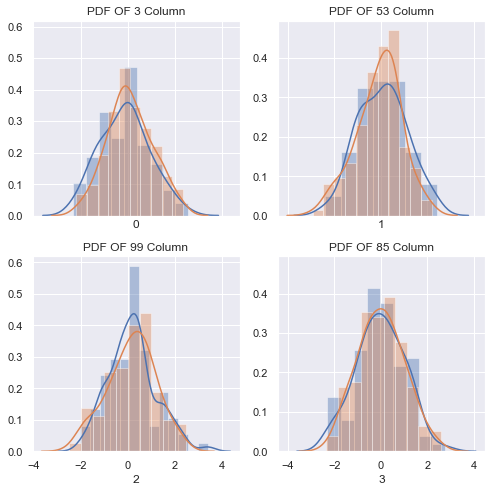

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(2,2,sharex='col',sharey='col',figsize=(7,7))
axes=axes.reshape(-1)
values=np.random.randint(0,299,4)
for i in range(0,4):
    sns.distplot(train_data[train_data["target"]==0][str(i)],ax=axes[i],label='class_0')
    sns.distplot(train_data[train_data["target"]==1][str(i)],ax=axes[i],label="class_1")
    axes[i].set_title('PDF OF {} Column'.format(values[i]))
fig.tight_layout()
plt.show()

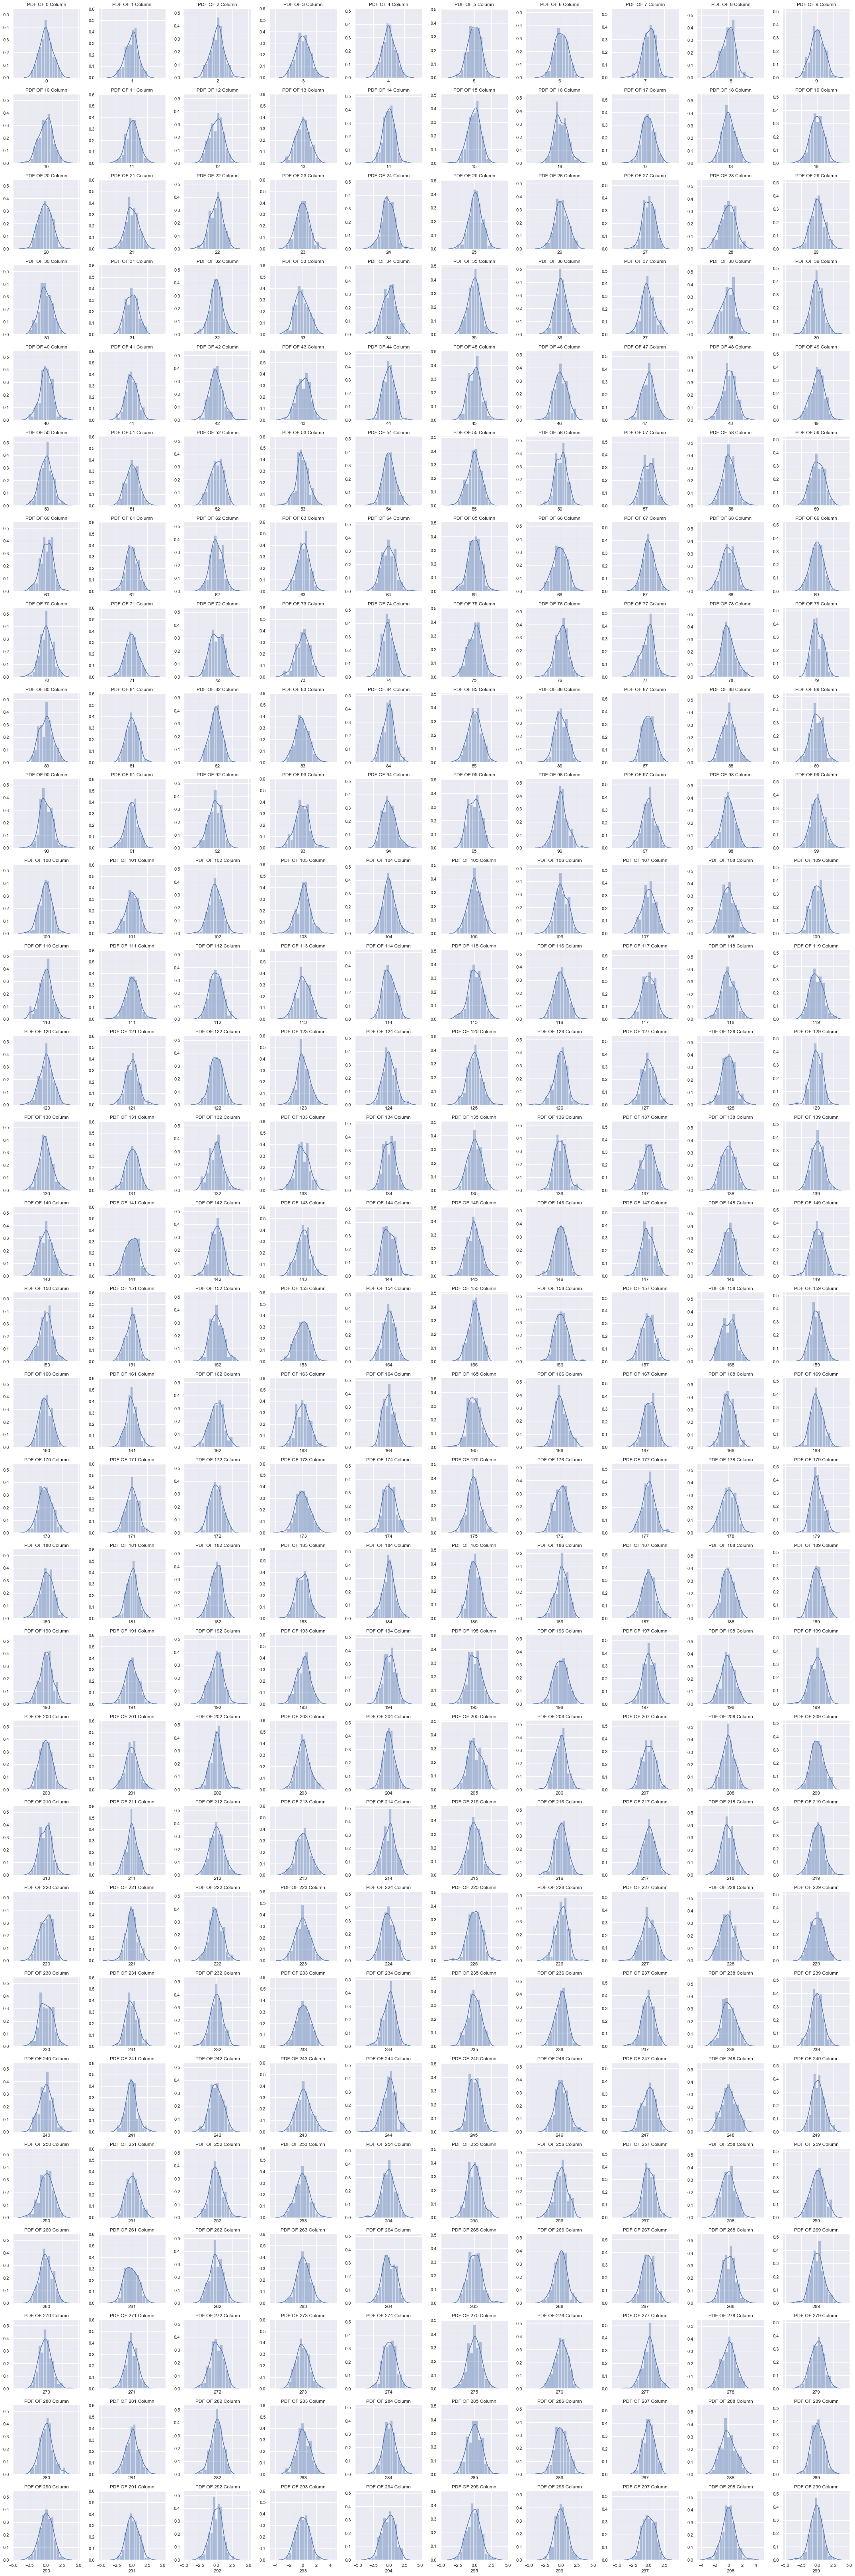

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(30,90)})
fig,axes=plt.subplots(30,10,sharex='col',sharey='col')
axes=axes.reshape(-1)
for i in range(0,300):
    sns.distplot(X_train[str(i)],ax=axes[i])
    axes[i].set_title('PDF OF {} Column'.format(i))
fig.tight_layout()
plt.show()

<h2>Observation </h2>

<b>

- Here We can see that most of our features follow a Gaussian/Normal like Distribution.

</b>

## Let us check the pdf with respect to our class labels

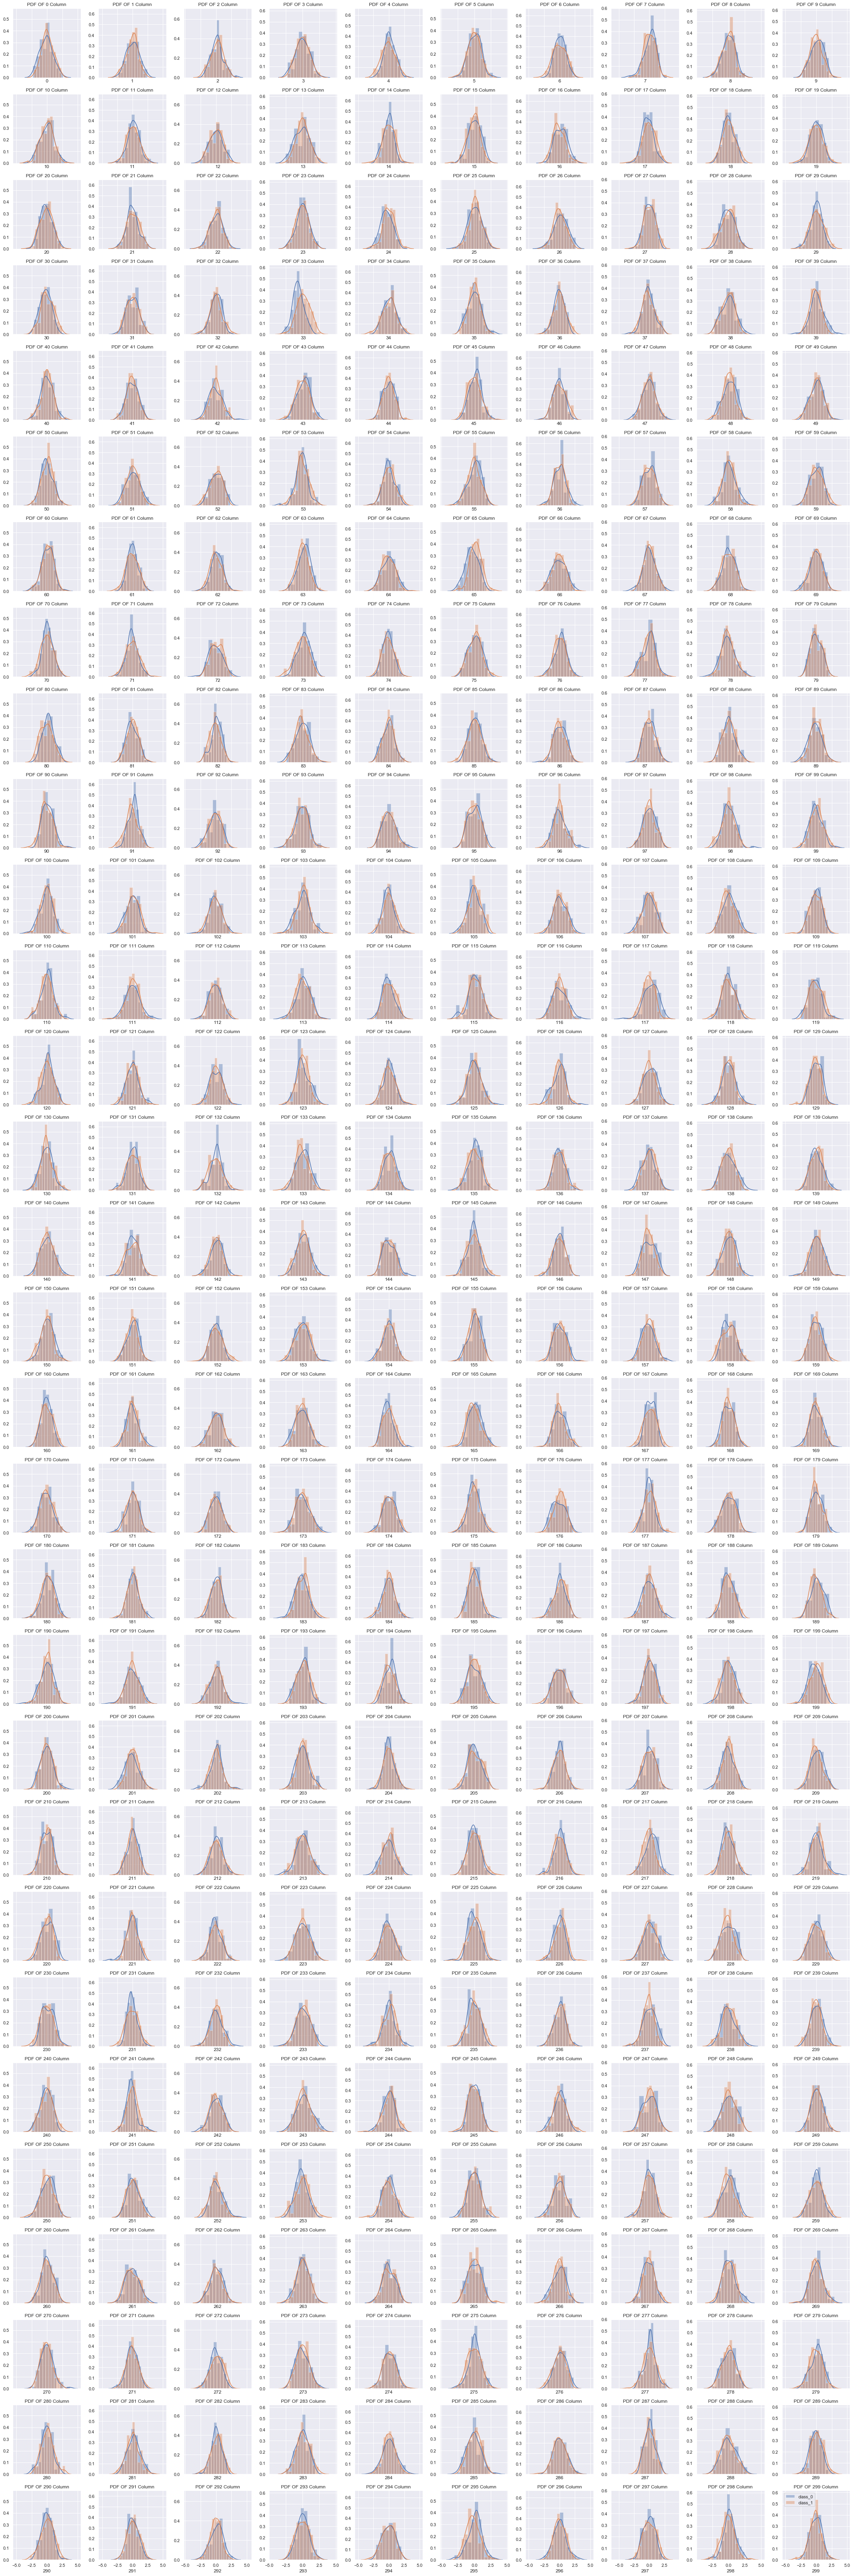

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(30,90)})
fig,axes=plt.subplots(30,10,sharex='col',sharey='col')
axes=axes.reshape(-1)
for i in range(0,300):
    sns.distplot(train_data[train_data["target"]==0][str(i)],ax=axes[i],label='class_0')
    sns.distplot(train_data[train_data["target"]==1][str(i)],ax=axes[i],label="class_1")
    axes[i].set_title('PDF OF {} Column'.format(i))
fig.tight_layout()
plt.legend()
plt.show()

<h2>Observation </h2>

<b>

- There is a lot of overlapping between the pdf's wrt our class labels. Might make things harder to separate and achieve higher AUC 

</b>

## By Observing the above plots,we can see that most our features are very Similar.So Let's Check the Box Plots for our Features

In [29]:
random_sample

array([247,  45, 272,  30])

In [30]:
train_data['45']

0      0.833
1     -1.102
2      0.972
3     -0.861
4      0.344
5      1.591
6     -0.999
7     -2.042
8     -0.145
9     -1.326
10     0.352
11    -0.702
12     0.679
13     0.442
14    -1.240
15    -0.149
16     0.506
17     0.278
18    -0.279
19    -0.714
20    -0.987
21     1.892
22     0.367
23    -1.382
24    -0.055
25     0.294
26     1.318
27    -0.021
28     0.289
29     0.051
       ...  
220   -1.333
221   -0.213
222   -1.246
223    0.937
224   -1.888
225   -0.672
226    0.121
227    0.491
228   -0.185
229    0.564
230   -0.714
231    1.424
232   -0.858
233   -0.379
234   -0.870
235   -1.538
236    0.465
237    0.346
238   -0.900
239    2.682
240    1.768
241    1.023
242   -0.445
243   -0.024
244    0.672
245   -1.019
246   -1.305
247    0.404
248   -0.309
249   -0.122
Name: 45, Length: 250, dtype: float64

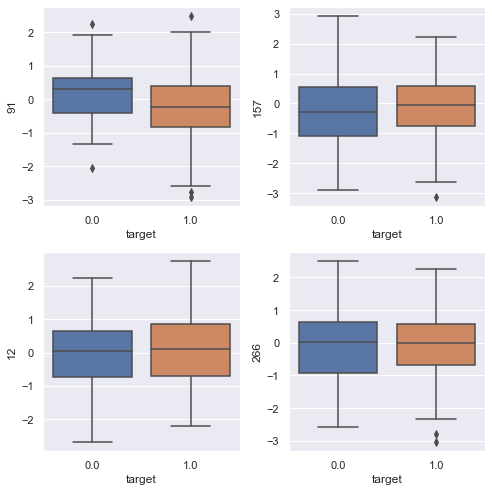

In [28]:
random_sample=np.random.randint(0,299,4)
fig,axes=plt.subplots(2,2,figsize=(7,7))
axes=axes.reshape(-1)
for i in range(0,4):
    sns.boxplot(data=train_data,x="target",y=str(random_sample[i]),ax=axes[i])
    #axes.set_title('Boxplot of COLUMN {}'.format(random_sample[i]))

fig.tight_layout()
plt.show()

<b>

- The important observation in the box plots of the features is that,we can see there is no significant
  change in the median value of our features.
- There are some outliers for some outliers.

- The same pattern can be seen when we run the same cell multiple times for different features.

<b>

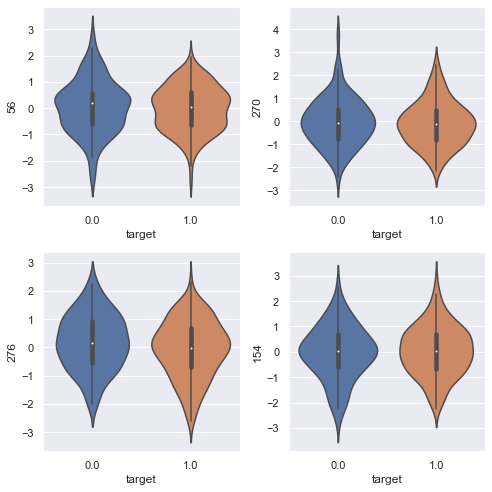

In [29]:
random_sample=np.random.randint(0,299,4)
fig,axes=plt.subplots(2,2,figsize=(7,7))
axes=axes.reshape(-1)
for i in range(0,4):
    sns.violinplot(data=train_data,x="target",y=str(random_sample[i]),ax=axes[i])
    #axes.set_title('Boxplot of COLUMN {}'.format(random_sample[i]))

fig.tight_layout()
plt.show()

<b>

 - Here we can see that some features have more fatter and bulgy  distributions on the basis of target class and the median        value mostly is seen in the same position


</b>